In [228]:
import pandas as pd
import json
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd

## 1- Connecting and loading Chinook database

In [229]:
with open('config/db_config.json', 'r') as config_file:
    db_config = json.load(config_file)

In [230]:
conn = mysql.connector.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database']
)

In [231]:
table_names = ["album","artist","customer","employee","genre","invoice","invoiceLine","mediaType","playlist","playlistTrack","track"]

In [232]:
album = pd.read_sql(f"SELECT * FROM album", conn)
artist = pd.read_sql(f"SELECT * FROM artist", conn)
customer = pd.read_sql(f"SELECT * FROM customer", conn)
employee = pd.read_sql(f"SELECT * FROM employee", conn)
genre = pd.read_sql(f"SELECT * FROM genre", conn)
invoice = pd.read_sql(f"SELECT * FROM invoice", conn)
invoiceLine = pd.read_sql(f"SELECT * FROM invoiceLine", conn)
mediaType = pd.read_sql(f"SELECT * FROM mediaType", conn)
playlist = pd.read_sql(f"SELECT * FROM playlist", conn)
playlistTrack = pd.read_sql(f"SELECT * FROM playlistTrack", conn)
track = pd.read_sql(f"SELECT * FROM track", conn)

conn.close()

C:\Users\negar\AppData\Local\Temp\ipykernel_23592\4190934377.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  album = pd.read_sql(f"SELECT * FROM album", conn)
C:\Users\negar\AppData\Local\Temp\ipykernel_23592\4190934377.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  artist = pd.read_sql(f"SELECT * FROM artist", conn)
C:\Users\negar\AppData\Local\Temp\ipykernel_23592\4190934377.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer = pd.read_sql(f"SELECT * FROM customer", conn)
C:\Users\negar\AppData\Local\Tem

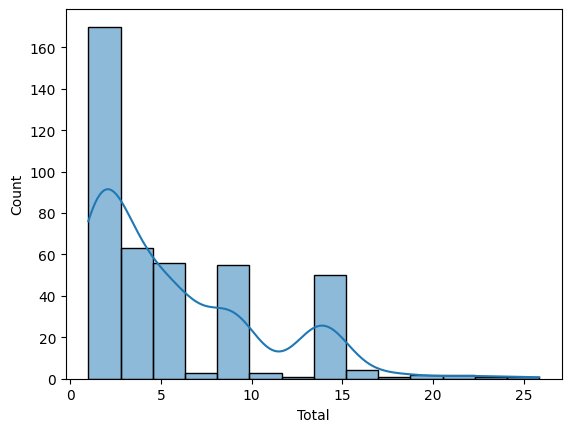

In [233]:
sns.histplot(invoice['Total'], kde=True);

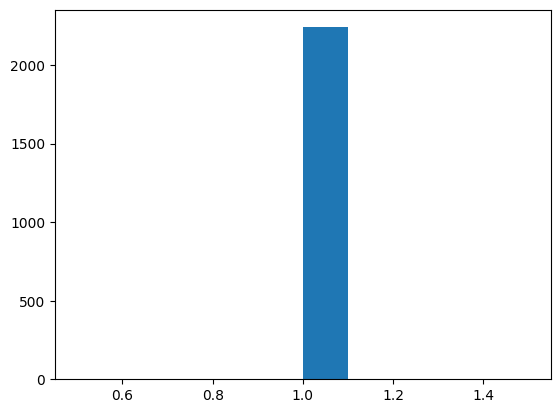

In [234]:
plt.hist(invoiceLine['Quantity']);

The customers only ordered one of the same track in each purchase.

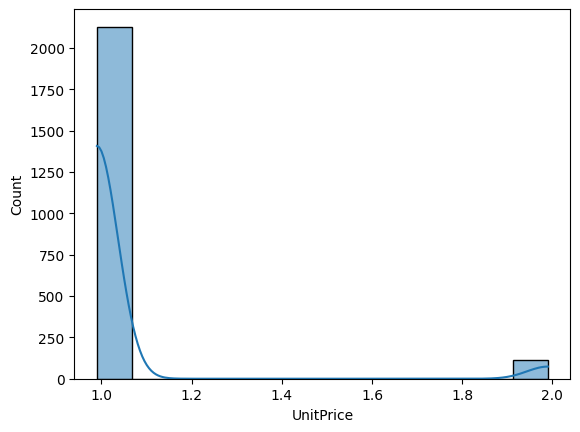

In [235]:
sns.histplot(invoiceLine['UnitPrice'], kde=True);

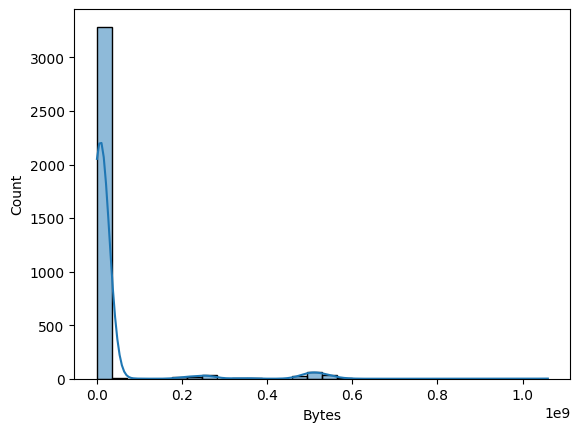

In [236]:
sns.histplot(track['Bytes'], kde=True, bins= 30);

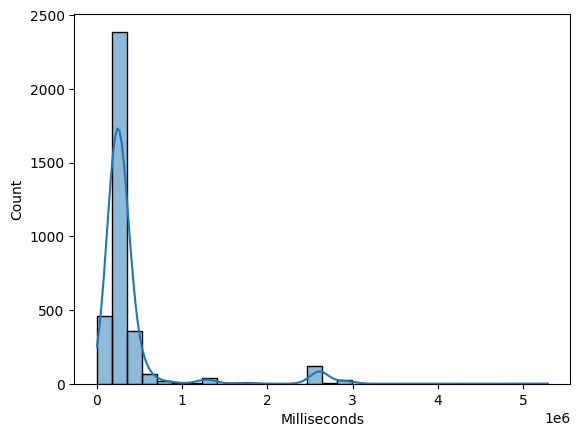

In [237]:
sns.histplot(track['Milliseconds'], kde=True, bins= 30);

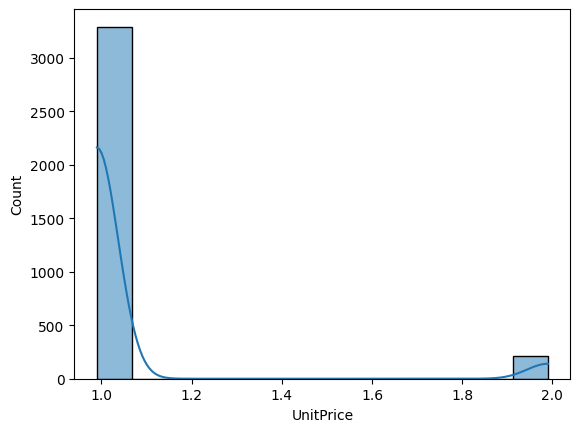

In [238]:
sns.histplot(track['UnitPrice'], kde=True);

In [239]:
support_rep_count = customer.groupby('SupportRepId')['CustomerId'].agg('count').reset_index(name='Count')
support_rep_count

,SupportRepId,Count
0,3,21
1,4,20
2,5,18


In [240]:
support_rep_count

,SupportRepId,Count
0,3,21
1,4,20
2,5,18


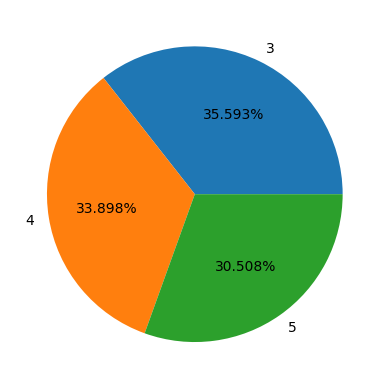

In [241]:
plt.pie(support_rep_count['Count'], labels=support_rep_count['SupportRepId'], autopct='%1.3f%%');

The customers were distrebuted between employees almost at the same rate.

In [242]:
genre_merged_track = pd.merge(track, genre, on='GenreId', suffixes=['_track','_genre'])
genre_count = genre_merged_track.groupby(['GenreId','Name_genre'])['TrackId'].agg('count').reset_index(name='Count')
genre_count['Percentage'] = ((genre_count['Count'] / genre_count['Count'].sum()) * 100).round(2)

# genre_count

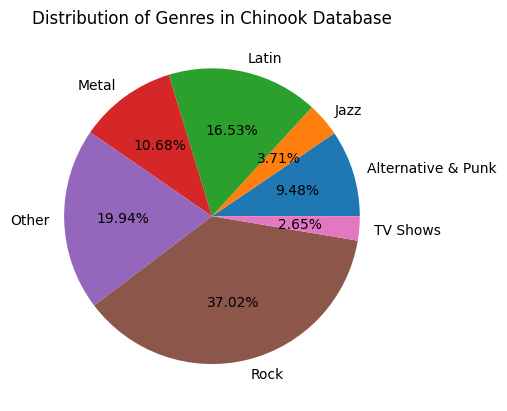

In [243]:
genre_count['labels_combined'] = genre_count['Name_genre'].where(genre_count['Percentage'] >= 2.5, 'Other')
genre_count_combined = genre_count.groupby('labels_combined', as_index=False)['Percentage'].agg('sum')

plt.pie(genre_count_combined['Percentage'], labels=genre_count_combined['labels_combined'], autopct='%1.2f%%')
plt.title("Distribution of Genres in Chinook Database")
plt.show()

In [244]:
mediaType
mediaType_merged_track = pd.merge(track, mediaType, on='MediaTypeId', suffixes=['_track','_mediaType'])
mediaType_count = mediaType_merged_track.groupby(['MediaTypeId','Name_mediaType'])['TrackId'].agg('count').reset_index(name='Count')
mediaType_count['Percentage'] = ((mediaType_count['Count'] / mediaType_count['Count'].sum()) * 100).round(2)
mediaType_count
# genre_count

,MediaTypeId,Name_mediaType,Count,Percentage
0,1,MPEG audio file,3034,86.61
1,2,Protected AAC audio file,237,6.77
2,3,Protected MPEG-4 video file,214,6.11
3,4,Purchased AAC audio file,7,0.20
4,5,AAC audio file,11,0.31


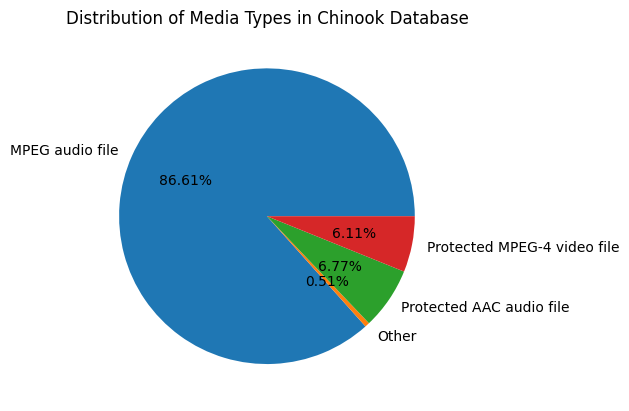

In [245]:
mediaType_count['labels_combined'] = mediaType_count['Name_mediaType'].where(mediaType_count['Percentage'] >= 5, 'Other')
mediaType_count_combined = mediaType_count.groupby('labels_combined', as_index=False)['Percentage'].agg('sum')

plt.pie(mediaType_count_combined['Percentage'], labels=mediaType_count_combined['labels_combined'], autopct='%1.2f%%')
plt.title("Distribution of Media Types in Chinook Database")
plt.show()

avg tracks on each album

In [246]:
tracks_per_album = track.groupby('AlbumId')['TrackId'].agg('count').reset_index(name='Count')
avg_tracks_per_album = np.mean(tracks_per_album['Count'])
print(f"The average number of tracks per album is {round(avg_tracks_per_album)}.")

The average number of tracks per album is 10.


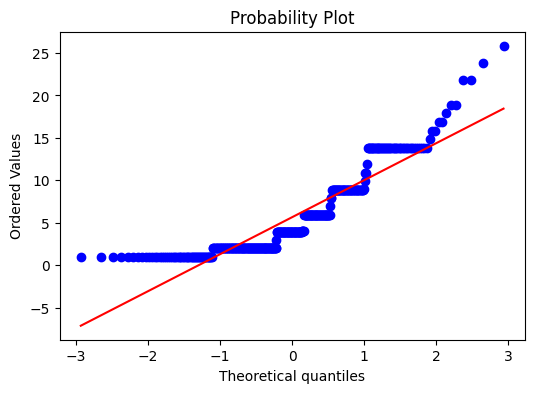

In [247]:
# QQ plot

plt.figure(figsize=(6, 4))
stats.probplot(invoice['Total'], dist="norm", plot=plt)

plt.show()


In [248]:
# Shapiro-Wilk test

# Null hypothesis: The Math Score data set is normally distributed.
# Alternative hypothesis: The Math Score data set is not normally distributed.



statistic, p_value = stats.shapiro(invoice['Total'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, The Math Score data set is not normally distributed.")
else:
    print("Fail to reject the null hypothesis, indicating that the data is normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.8367111017894937, p-value = 3.4001843897448504e-20
T-statistic: 0.8367111017894937, p-value: 3.4001843897448504e-20
Reject the null hypothesis, The Math Score data set is not normally distributed.


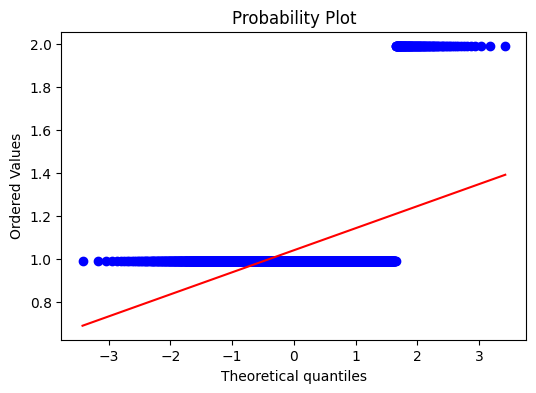

In [249]:
# QQ plot

plt.figure(figsize=(6,4))
stats.probplot(invoiceLine['UnitPrice'], dist="norm", plot=plt)

plt.show()


In [250]:
# Shapiro-Wilk test

# Null hypothesis: The Math Score data set is normally distributed.
# Alternative hypothesis: The Math Score data set is not normally distributed.



statistic, p_value = stats.shapiro(invoiceLine['UnitPrice'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, The Math Score data set is not normally distributed.")
else:
    print("Fail to reject the null hypothesis, indicating that the data is normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.22256856261663105, p-value = 2.1025064392269568e-70
T-statistic: 0.22256856261663105, p-value: 2.1025064392269568e-70
Reject the null hypothesis, The Math Score data set is not normally distributed.


In [251]:
track.sort_values(by='Milliseconds', ascending= False)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
2819,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
3223,3224,Through a Looking Glass,229,3,21,None,5088838,1059546140,1.99
3243,3244,"Greetings from Earth, Pt. 1",253,3,20,None,2960293,536824558,1.99
3241,3242,The Man With Nine Lives,253,3,20,None,2956998,577829804,1.99
3226,3227,"Battlestar Galactica, Pt. 2",253,3,20,None,2956081,521387924,1.99
...,...,...,...,...,...,...,...,...,...
3303,3304,Commercial 1,258,1,17,L. Muggerud,7941,319888,0.99
177,178,Oprah,18,1,4,None,6635,224313,0.99
169,170,A Statistic,18,1,4,None,6373,211997,0.99
167,168,Now Sports,18,1,4,None,4884,161266,0.99


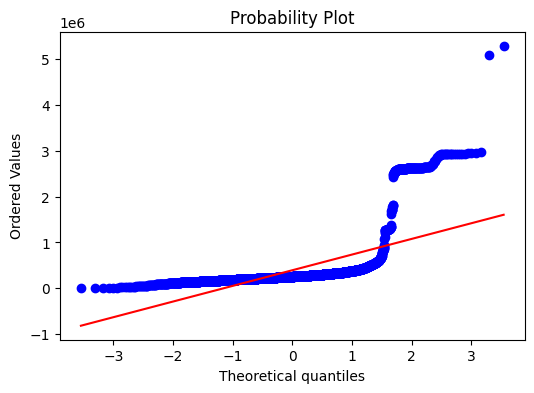

In [252]:
# QQ plot

plt.figure(figsize=(6, 4))
stats.probplot(track['Milliseconds'], dist="norm", plot=plt)

plt.show()


In [253]:
# Shapiro-Wilk test

# Null hypothesis: The Math Score data set is normally distributed.
# Alternative hypothesis: The Math Score data set is not normally distributed.



statistic, p_value = stats.shapiro(track['Milliseconds'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, The Math Score data set is not normally distributed.")
else:
    print("Fail to reject the null hypothesis, indicating that the data is normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.4069350980582944, p-value = 2.7287436202313686e-75
T-statistic: 0.4069350980582944, p-value: 2.7287436202313686e-75
Reject the null hypothesis, The Math Score data set is not normally distributed.


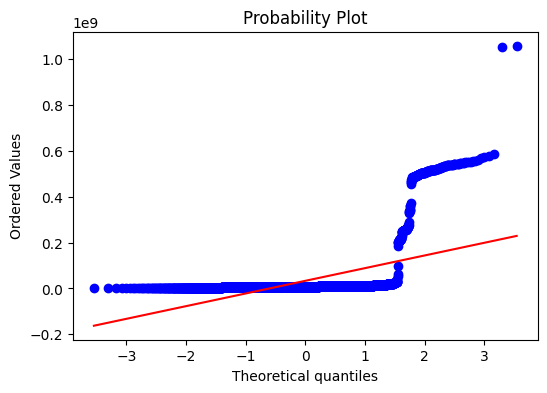

In [254]:
# QQ plot

plt.figure(figsize=(6,4))
stats.probplot(track['Bytes'], dist="norm", plot=plt)

plt.show()


In [255]:
# Shapiro-Wilk test

# Null hypothesis: The Math Score data set is normally distributed.
# Alternative hypothesis: The Math Score data set is not normally distributed.



statistic, p_value = stats.shapiro(track['Bytes'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, The Math Score data set is not normally distributed.")
else:
    print("Fail to reject the null hypothesis, indicating that the data is normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.2756405817618164, p-value = 1.7275565060666367e-79
T-statistic: 0.2756405817618164, p-value: 1.7275565060666367e-79
Reject the null hypothesis, The Math Score data set is not normally distributed.


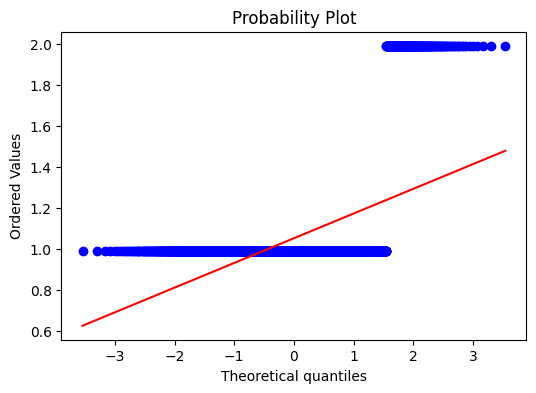

In [256]:
# QQ plot

plt.figure(figsize=(6, 4))
stats.probplot(track['UnitPrice'], dist="norm", plot=plt)

plt.show()


In [257]:
# Shapiro-Wilk test

# Null hypothesis: The Math Score data set is normally distributed.
# Alternative hypothesis: The Math Score data set is not normally distributed.



statistic, p_value = stats.shapiro(track['UnitPrice'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, The Math Score data set is not normally distributed.")
else:
    print("Fail to reject the null hypothesis, indicating that the data is normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.25366636273367993, p-value = 3.981126478782177e-80
T-statistic: 0.25366636273367993, p-value: 3.981126478782177e-80
Reject the null hypothesis, The Math Score data set is not normally distributed.


I checked Histogram, Q-Q Test and Shapiro Test for Normality and none of key variables is normally distributed.

In [258]:
def outliers(df, column):
    q1 = np.percentile(df[column], 25)
    q2 = np.percentile(df[column], 50)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    outlier = df[(df[column] < lower) | (df[column] > upper)]
    return outlier

In [259]:
outliers(invoice, 'Total')

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
95,96,45,2022-02-18,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073,21.86
193,194,46,2023-04-28,3 Chatham Street,Dublin,Dublin,Ireland,None,21.86
298,299,26,2024-08-05,2211 W Berry Street,Fort Worth,TX,USA,76110,23.86
403,404,6,2025-11-13,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86


In [260]:
outliers(invoiceLine, 'UnitPrice')

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
467,468,87,2820,1.99,1
468,469,88,2826,1.99,1
469,470,88,2832,1.99,1
470,471,88,2838,1.99,1
471,472,88,2844,1.99,1
...,...,...,...,...,...
2196,2197,404,2895,1.99,1
2197,2198,404,2904,1.99,1
2198,2199,404,2913,1.99,1
2199,2200,404,2922,1.99,1


In [261]:
outliers(track, 'Milliseconds')

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
126,127,Stratus,13,1,2,Billy Cobham,582086,19115680,0.99
141,142,No More Tears,14,1,3,None,555075,18041629,0.99
153,154,Sleeping Village,16,1,3,None,644571,21128525,0.99
155,156,Wheels Of Confusion / The Straightener,17,1,3,"Tony Iommi, Bill Ward, Geezer Butler, Ozzy Osb...",494524,16065830,0.99
167,168,Now Sports,18,1,4,None,4884,161266,0.99
...,...,...,...,...,...,...,...,...,...
3444,3445,On the Beautiful Blue Danube,311,2,24,Johann Strauss II,526696,8610225,0.99
3445,3446,"Symphonie Fantastique, Op. 14: V. Songe d'une ...",312,2,24,Hector Berlioz,561967,9173344,0.99
3476,3477,Amy Amy Amy (Outro),322,2,9,"Astor Campbell, Delroy ""Chris"" Cooper, Donovan...",663426,10564704,0.99
3484,3485,Symphony No. 3 Op. 36 for Orchestra and Sopran...,330,2,24,Henryk Górecki,567494,9273123,0.99


In [262]:
outliers(track, 'Bytes')

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
126,127,Stratus,13,1,2,Billy Cobham,582086,19115680,0.99
141,142,No More Tears,14,1,3,None,555075,18041629,0.99
153,154,Sleeping Village,16,1,3,None,644571,21128525,0.99
167,168,Now Sports,18,1,4,None,4884,161266,0.99
169,170,A Statistic,18,1,4,None,6373,211997,0.99
...,...,...,...,...,...,...,...,...,...
3363,3364,"There's No Place Like Home, Pt. 3",261,3,21,None,2582957,486161766,1.99
3401,3402,"Band Members Discuss Tracks from ""Revelations""",271,3,23,None,294294,61118891,0.99
3427,3428,Branch Closing,251,3,22,None,1814855,360331351,1.99
3428,3429,The Return,251,3,22,None,1705080,343877320,1.99


In [263]:
outliers(track, 'UnitPrice')

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
2818,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99
2819,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
2820,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99
2821,2822,"Exodus, Pt. 2",227,3,19,None,2618000,466820021,1.99
2822,2823,Collaborators,227,3,19,None,2626626,483484911,1.99
...,...,...,...,...,...,...,...,...,...
3361,3362,"There's No Place Like Home, Pt. 1",261,3,21,None,2609526,522919189,1.99
3362,3363,"There's No Place Like Home, Pt. 2",261,3,21,None,2497956,523748920,1.99
3363,3364,"There's No Place Like Home, Pt. 3",261,3,21,None,2582957,486161766,1.99
3427,3428,Branch Closing,251,3,22,None,1814855,360331351,1.99


Given the high number of detected outliers, removing them could introduce bias and distort the true distribution of the data.

In [264]:
invoiceLine_merged_track = pd.merge(invoiceLine, track)
# invoiceLine_merged_track

In [265]:
three_most_popular_genres = invoiceLine_merged_track['GenreId'].value_counts().reset_index(name="Count").head(3)
three_most_popular_genres_index = three_most_popular_genres['GenreId']

In [266]:
genre[genre['GenreId'].isin(three_most_popular_genres_index)]

,GenreId,Name
0,1,Rock
2,3,Metal
6,7,Latin


In [342]:
rock_price = genre_merged_track[(genre_merged_track['GenreId'] == 1)]['UnitPrice']
metal_price = genre_merged_track[(genre_merged_track['GenreId'] == 3)]['UnitPrice']
latin_price = genre_merged_track[(genre_merged_track['GenreId'] == 7)]['UnitPrice']

rock_price_set = set(rock_price)
metal_price_set = set(metal_price)
latin_price_set = set(latin_price)


if (rock_price_set == metal_price_set) & (metal_price_set == latin_price_set):
    print(f"All three most popluar genres have the same price for each track: {rock_price.loc[0]}$.")
    print("There is no need for a hypothesis test because all the values are the same.")
else:
    print('We should use Kruskal Hypothesis test for non-normal categorical variables.')

    # Null hypothesis: There is no significant difference in price between most popular genres.
    # Alternative hypothesis: There is a significant difference in price between most popular genres.
    
    groups = [rock_price, metal_price, latin_price]
    kruskal_result = stats.kruskal(*groups)
    t_statistic, p_value = stats.kruskal(*groups)
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in price between most popular genres.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in price between most popular genres.")

All three most popluar genres have the same price for each track: 0.99$.
There is no need for a hypothesis test because all the values are the same.


In [269]:
spearman_corr_track_length_price, p_value_track_length_price = stats.spearmanr(track['Milliseconds'], track['UnitPrice'])
print(spearman_corr_track_length_price, p_value_track_length_price)

0.4099206080846446 4.576036687486155e-142


In [270]:
alpha = 0.05
if p_value_track_length_price < alpha:
    print("The track length and price are dependent.")
    if abs(spearman_corr_track_length_price) >= 0.5:
        print("There is a large dependency between length and price of each track.")
    elif abs(spearman_corr_track_length_price) >= 0.3:
        print("There is a medium dependency between length and price of each track.")
    else:
        print("There is a small dependency between length and price of each track.")
else:
    print("The track length and price are independent.")

The track length and price are dependent.
There is a medium dependency between length and price of each track.


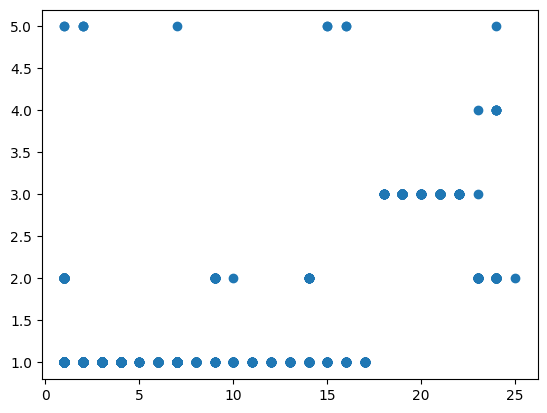

In [271]:
plt.scatter(genre_merged_track['GenreId'], genre_merged_track['MediaTypeId'])

Two categorial variables so chi2 test.

In [272]:

# Contingency table of Genre and MediaType
contingency_table_genre_mediatype = pd.crosstab(genre_merged_track['GenreId'], genre_merged_track['MediaTypeId'])

# Hypothesis Test: Association between Genre and MediaType
# Null hypothesis: There is no significant association between Genre and MediaType.
# Alternative hypothesis: There is a significant association between Genre and MediaType.
chi2_statistic_genre_mediatype, p_value_genre_mediatype, dof_genre_mediatype, expected_genre_mediatype = stats.chi2_contingency(contingency_table_genre_mediatype)
print(f"Chi-square statistic: {chi2_statistic_genre_mediatype}, p-value: {p_value_genre_mediatype}")

# Interpretation
alpha = 0.05
if p_value_genre_mediatype < alpha:
    print("Reject the null hypothesis. There is a significant association between Genre and MediaType.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Genre and MediaType.")

Chi-square statistic: 5650.1804373219775, p-value: 0.0
Reject the null hypothesis. There is a significant association between Genre and MediaType.


In [273]:
# Merge customer and invoice data
customer_merged_invoice = pd.merge(customer, invoice)
# Group total spending by country
grouped_data = customer_merged_invoice.groupby('Country')['Total'].apply(list)
groups = grouped_data.tolist()

# Null hypothesis: There is no significant difference in total spending across different countries.
# Alternative hypothesis: There is a significant difference in total spending across different countries.

f_statistic, p_value = stats.kruskal(*groups)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in total spending across countries.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in total spending across countries.")


F-statistic: 0.8839678174341911, p-value: 0.999999999999593
Fail to reject the null hypothesis. There is no significant difference in total spending across countries.


fbhr

In [274]:
# mediatype and track size



In [275]:
# Group track size by media type
grouped_data = mediaType_merged_track.groupby('MediaTypeId')['Bytes'].apply(list)
groups = grouped_data.tolist()

# Null hypothesis: There is no significant difference in track size across different media types.
# Alternative hypothesis: There is a significant difference in track size across different media types.

# f_statistic, p_value = stats.friedmanchisquare(*groups)

# alpha = 0.05
# if p_value < alpha:
#     print("Reject the null hypothesis. There is a significant difference in track size across media types.")
# else:
#     print("Fail to reject the null hypothesis. There is no significant difference in track size across media types.")

In [276]:
mediaType_merged_track[['MediaTypeId','Bytes']]

,MediaTypeId,Bytes
0,1,11170334
1,2,5510424
2,2,3990994
3,2,4331779
4,2,6290521
...,...,...
3498,2,4718950
3499,2,2283131
3500,2,1189062
3501,2,3665114


In [277]:
# supportrep and customer total spent

# Group total spending by support representative
grouped_data = customer_merged_invoice.groupby('SupportRepId')['Total'].apply(list)
groups = grouped_data.tolist()

# Null hypothesis: There is no significant difference in total spending across different support representatives.
# Alternative hypothesis: There is a significant difference in total spending across different support representatives.

f_statistic, p_value = stats.f_oneway(*groups)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in total spending across support representatives.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in total spending across support representatives.")

Fail to reject the null hypothesis. There is no significant difference in total spending across support representatives.


In [ ]:
# plot sum each employee

## 8

In [ ]:
# kruskal